Import Libraries

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
import numpy as np
import os


Dataset Loading

In [23]:
# Define paths and actions
data_path = "action_data"  # Main directory for data
actions = ["Walking", "Squat", "Crunching", "Alternate Toe Touch", "Jumping Jacks", "Right Shot", "Left Shot"]  # Actions to collect data for
threshold = 0.8  # Confidence threshold for action recognition
motion_threshold = 0.2  # Threshold for minimum motion to classify as a valid action
required_sequences = 30  # Expected number of sequences per action
sequence_length = 20  # Length of each sequence

In [43]:
import numpy as np
import os


# Specify the folder where the datasets are saved
save_folder = "data_splits"

# Load datasets from the specified folder
X_train = np.load(os.path.join(save_folder, "X_train.npy"))
X_val = np.load(os.path.join(save_folder, "X_val.npy"))
X_test = np.load(os.path.join(save_folder, "X_test.npy"))
y_train = np.load(os.path.join(save_folder, "y_train.npy"))
y_val = np.load(os.path.join(save_folder, "y_val.npy"))
y_test = np.load(os.path.join(save_folder, "y_test.npy"))

print("Datasets loaded successfully!")


print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")



Datasets loaded successfully!
Training set: (147, 20, 255), Validation set: (31, 20, 255), Test set: (32, 20, 255)


In [44]:
# Extract the number of actions dynamically
num_classes = y_train.shape[1]

In [45]:
# Verify data shapes
print(f"Training set: X={X_train.shape}, y={y_train.shape}")
print(f"Validation set: X={X_val.shape}, y={y_val.shape}")
print(f"Test set: X={X_test.shape}, y={y_test.shape}")
print(f"Number of classes (actions): {num_classes}")

Training set: X=(147, 20, 255), y=(147, 7)
Validation set: X=(31, 20, 255), y=(31, 7)
Test set: X=(32, 20, 255), y=(32, 7)
Number of classes (actions): 7


# Model Construction

In [47]:
# Build the model dynamically based on input shape
model = Sequential([
    LSTM(128, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=False, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')  # Dynamically adjust based on the number of actions
])




Model Compiling 

In [48]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 20, 128)        │       196,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 20, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,399 (982.03 KB)

 Trainable params: 251,015 (980.53 KB)

 Non-trainable params: 384 (1.50 KB)

Summary

In [49]:
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 20, 128)        │       196,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 20, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,399 (982.03 KB)

 Trainable params: 251,015 (980.53 KB)

 Non-trainable params: 384 (1.50 KB)

None


Callbacks

In [50]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
checkpoint = ModelCheckpoint(
    "model_checkpoints/Latest_recognition_model.keras", 
    monitor="val_accuracy", 
    save_best_only=True, 
    mode="max", 
    verbose=1
)
early_stopping = EarlyStopping(
    monitor="val_accuracy", 
    patience=20, 
    mode="max", 
    verbose=1
)


Model Training

In [51]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Train the model with the callback
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=2000,
    batch_size=64,
    callbacks=[checkpoint] #You can asign early_stopping beside reduce_lr if you want to stop when model gets the highest result.
)


Epoch 1/2000
1/3 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.2031 - loss: 2.1715
Epoch 1: val_accuracy improved from -inf to 0.29032, saving model to model_checkpoints/Latest_recognition_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 324ms/step - accuracy: 0.2338 - loss: 2.1353 - val_accuracy: 0.2903 - val_loss: 1.9066
Epoch 2/2000
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4844 - loss: 1.4543
Epoch 2: val_accuracy improved from 0.29032 to 0.35484, saving model to model_checkpoints/Latest_recognition_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.4939 - loss: 1.4288 - val_accuracy: 0.3548 - val_loss: 1.8639
Epoch 3/2000
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7031 - loss: 1.1126
Epoch 3: val_accuracy improved from 0.35484 to 0.41935, saving model to model_checkpoints/Latest_recognition_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6591 - loss: 1.1322 - val_accuracy: 0.4194 - val_loss: 1.8390
Epoch 4/2000
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61m

Model Saving

In [52]:
# Save the trained model
model.save("model_save/Latest_lstm_action_recognition_model.keras")
print("Model saved successfully!")


Model saved successfully!


# Evaluation

Metrices

In [53]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 5.0975e-05
Test Accuracy: 100.00%


Classification Report

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict class probabilities on the test set
y_pred_probs = model.predict(X_test)

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         6

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Confusion Matrix:
[[5 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 5 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 4 0 0]
 [0 0 0 0 0 4 0]
 [0 0 0 0 0 0 6]]
Test Loss: 0.0001
Test Accuracy: 100.00%


Confusion Matrix

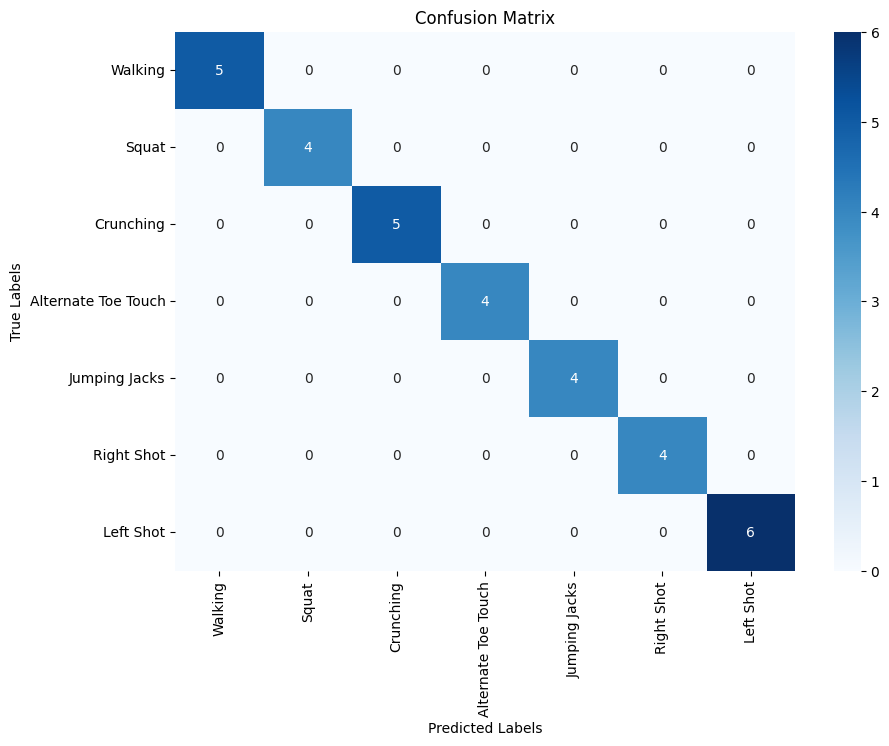

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=actions, yticklabels=actions)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Save the plot as an image file before displaying it
plt.savefig("Confusion Matrix/Latest.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


Model Accuracy

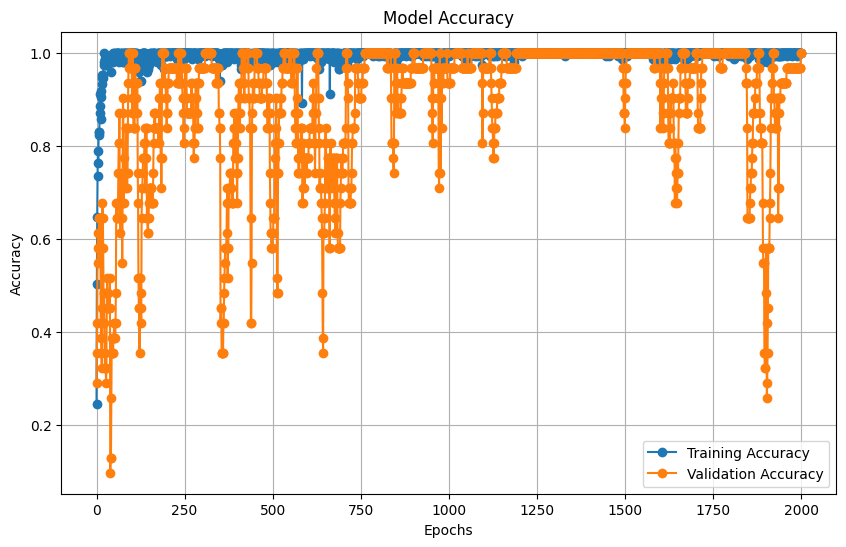

In [56]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



Model Loss

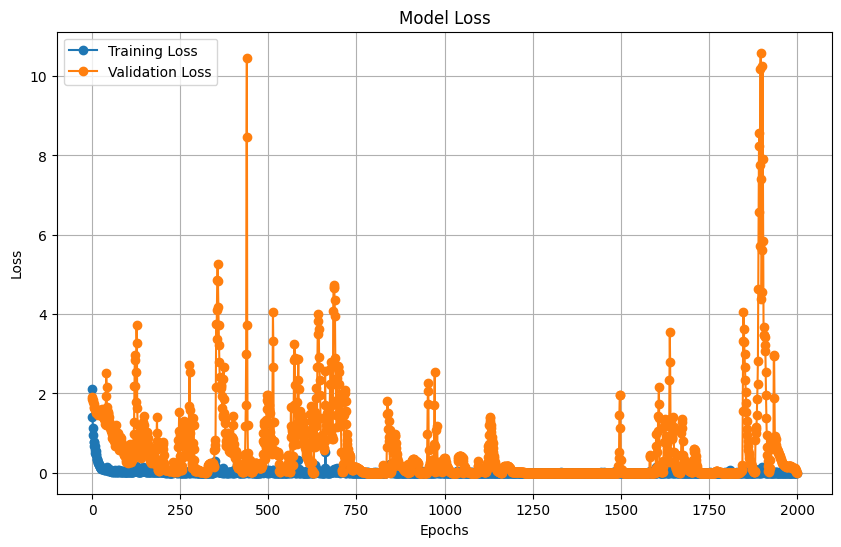

In [57]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


ROC Curve

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


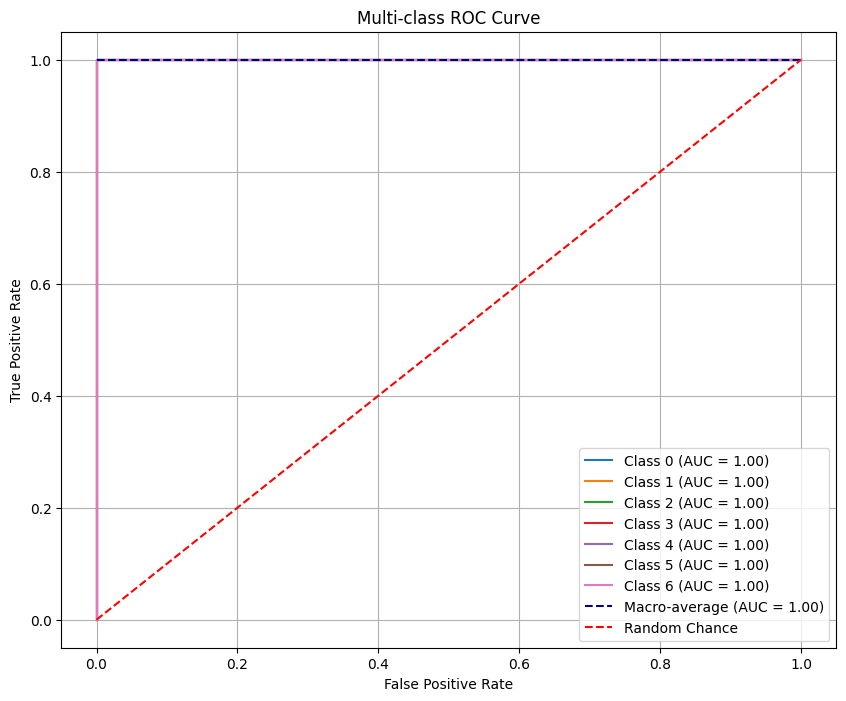

In [59]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the true labels (one-hot encoding)
n_classes = y_test.shape[1]
y_test_binarized = y_test  # Assuming `y_test` is already one-hot encoded

# Predict probabilities for the test set
y_pred_probs = model.predict(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the ROC curves
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
for i in range(n_classes):
    plt.plot(
        fpr[i], tpr[i],
        label=f"Class {i} (AUC = {roc_auc[i]:.2f})"
    )

# Plot macro-average ROC curve
plt.plot(
    fpr["macro"], tpr["macro"],
    label=f"Macro-average (AUC = {roc_auc['macro']:.2f})",
    color="navy", linestyle="--"
)

# Plot the random chance line
plt.plot([0, 1], [0, 1], "r--", label="Random Chance")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
